### Libraries

In [4]:
import sys
sys.path.append('../python-scripts')
from fletcher import *

/Users/Joe/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

## Crowdflower: Hate Speech Identification

In [7]:
crowdflower = '../data/crowdflower-hate-speech-identification/data/twitter_hate_speech_classifier_dfe_a845520.csv'
crowdflower = pd.read_csv(crowdflower)

In [8]:
crowdflower.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,does_this_tweet_contain_hate_speech,does_this_tweet_contain_hate_speech_confidence,created_at,orig_golden,orig_last_judgment_at,orig_trusted_judgments,orig_unit_id,orig_unit_state,updated_at,orig_does_this_tweet_contain_hate_speech,does_this_tweet_contain_hate_speech_gold,does_this_tweet_contain_hate_speech_gold_reason,does_this_tweet_contain_hate_speechconfidence,tweet_id,tweet_text
0,853718217,True,golden,86,NaN,The tweet uses offensive language but not hate...,0.6013,NaN,True,NaN,False,615561535.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,True,1666196150,Warning: penny boards will make you a faggot
1,853718218,True,golden,92,NaN,The tweet contains hate speech,0.7227,NaN,True,NaN,False,615561723.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,True,429512078,Fuck dykes
2,853718219,True,golden,86,NaN,The tweet contains hate speech,0.5229,NaN,True,NaN,False,615562039.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,True,395623778,@sizzurp__ @ILIKECATS74 @yoPapi_chulo @brandon...
3,853718220,True,golden,98,NaN,The tweet contains hate speech,0.5184,NaN,True,NaN,False,615562068.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,True,497514685,"""@jayswaggkillah: ""@JacklynAnnn: @jayswaggkill..."
4,853718221,True,golden,88,NaN,The tweet uses offensive language but not hate...,0.5185,NaN,True,NaN,False,615562488.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,True,588923553,@Zhugstubble You heard me bitch but any way I'...


In [9]:
crowdflower['does_this_tweet_contain_hate_speech'].value_counts()

The tweet is not offensive                               7274
The tweet uses offensive language but not hate speech    4836
The tweet contains hate speech                           2399
Name: does_this_tweet_contain_hate_speech, dtype: int64

## Thomas R Davidson: Hate Speech and Offensive Language

In [10]:
davidson = '../data/thomasrdavidson-hate-speech-and-offensive-language/data/labeled_data.csv'
davidson = pd.read_csv(davidson)

In [11]:
davidson.head()

,column_a,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [34]:
tweet_counts

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [39]:
tweet_counts = davidson['class'].value_counts()
tweet_counts = pd.DataFrame(tweet_counts)
tweet_counts.index = tweet_counts.index.map(str)
tweet_counts.rename(columns = {'class': 'Tweets'},
                    index = {'0': 'Hate Speech', '1': 'Offensive Language', '2': 'Neither'},
                    inplace=True)
tweet_counts

,Tweets
Offensive Language,19190
Neither,4163
Hate Speech,1430


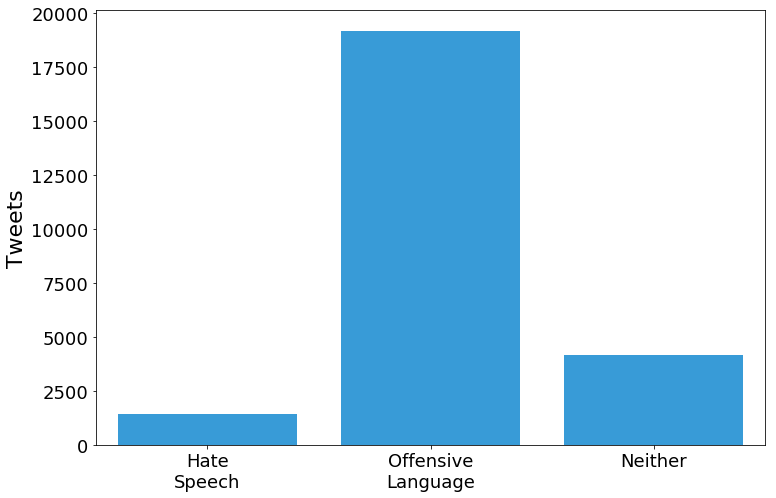

In [69]:
plt.figure(figsize=(12,8))
sns.barplot(x=['Hate\nSpeech', 'Offensive\nLanguage', 'Neither'],
            y=[1430, 19190, 4163],
            color='#1DA1F2')
plt.ylabel('Tweets', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.savefig('tweet value counts.png')

This dataset is less balanced, but has more clean tweets. The curator has posted this as a "cleaned" version of the dataset. But it lacks a tweet ID, which I really need.

In [2]:
# dummy model: No tweet has hate speech
(24783 - 1430)/24783

0.9422991566799822

In [3]:
# dummy model: all tweets are offenseive
(24783 - 1430 - 4163)/24783

0.7743211072105879

## Merging the datasets.

I would of course prefer the "cleaned" dataset, but lacks tweet IDs. Can I merge on the tweet text to reclaim tweet IDs? Not all of the tweet IDs are valid anyway.

In [9]:
davidson.shape

(24783, 7)

In [11]:
crowdflower.shape

(14509, 20)

In [5]:
len(crowdflower['tweet_id'].dropna())

14509

In [18]:
df = pd.merge(davidson, crowdflower[['tweet_text', 'tweet_id']], how='left', left_on='tweet', right_on='tweet_text')

In [19]:
df.shape

(24783, 27)

In [20]:
len(df['tweet_id'].dropna())

10

In [23]:
davidson['tweet'].head()

0    !!! RT @mayasolovely: As a woman you shouldn't...
1    !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2    !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3    !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4    !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
Name: tweet, dtype: object

In [24]:
crowdflower['tweet_text'].head()

0         Warning: penny boards will make you a faggot
1                                           Fuck dykes
2    @sizzurp__ @ILIKECATS74 @yoPapi_chulo @brandon...
3    "@jayswaggkillah: "@JacklynAnnn: @jayswaggkill...
4    @Zhugstubble You heard me bitch but any way I'...
Name: tweet_text, dtype: object

The tweet IDs aren't valid anyway. No point in merging the datasets.

In [26]:
len(set(crowdflower['tweet_id']))

63

### Reviewing Reviewer Count

Don't think there's anything super significant here.

In [29]:
davidson['count'].value_counts()

3    22807
6     1571
4      211
9      167
7       27
Name: count, dtype: int64

### Simplifying for a Two-Stage Classifier

In [27]:
davidson.head(2)

,column_a,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...


In [36]:
data = davidson[['class', 'tweet']]

In [39]:
data['class_first'] = data['class'].apply(lambda x: 0 if x<2 else 1)
data.rename(columns={'class': 'class_second'}, inplace=True)

/Users/Joe/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Joe/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [40]:
data

,class_second,tweet,class_first
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,1
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",0
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",0
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,0
8,1,""" &amp; you might not get ya bitch back &amp; ...",0
9,1,""" @rhythmixx_ :hobbies include: fighting Maria...",0


In [41]:
save_pickle(data, 'cleaned_data.pkl')